In [1]:
#OpenCV module
import cv2
#os module for reading training data directories and paths
import os
#numpy to convert python lists to numpy arrays as it is needed by OpenCV face recognizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#there is no label 0 in our training data so subject name for index/label 0 is empty
subjects = ["", "025 - Shivam", "002 - Ashish","202 - Shubham","013 - Kunal"]

In [3]:
subjects[1]

'025 - Shivam'

In [4]:
#function to detect face using OpenCV
def detect_face(img):
    #convert the test image to gray scale as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow: Haar classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
 
    #let's detect multiscale images(some images may be closer to camera than others)
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3);

    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
 
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]

    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [5]:
#this function will read all persons' training images, detect face from each image
#and will return two lists of exactly same size, one list 
#of faces and another list of labels for each face
def prepare_training_data(data_folder_path):
 
    #------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    print(dirs)

    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []

    #let's go through each directory and read images within it
    for dir_name in dirs:
        if dir_name != "test":
            label = dir_name
            subject_dir_path = data_folder_path + "/" + dir_name

            #get the images names that are inside the given subject directory
            subject_images_names = os.listdir(subject_dir_path)

            #------STEP-3--------
            #go through each image name, read image, 
            #detect face and add face to list of faces
            for image_name in subject_images_names:

            #build image path
            #sample image path = training-data/s1/1.pgm
                image_path = subject_dir_path + "/" + image_name
                image = cv2.imread(image_path)
                cv2.imshow("Training on image...", image)
                cv2.waitKey(100)
                #detect face
                face, rect = detect_face(image)

                #------STEP-4--------
                #for the purpose of this tutorial
                #we will ignore faces that are not detected
                if face is not None:
                    #add face to list of faces
                    faces.append(face)
                    #add label for this face
                    labels.append(label)

                    cv2.destroyAllWindows()
                    cv2.waitKey(1)
                    cv2.destroyAllWindows()
    return faces, labels

In [6]:
#let's first prepare our training data
#data will be in two lists of same size
#one list will contain all the faces
#and the other list will contain respective labels for each face
print("Preparing data...")
faces, labels = prepare_training_data(r"F:/Faces/")
print("Data prepared")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
['001 - Shivam', '002 - Ashish', '003 - Shubham', '004 - Kunal', 'test']
Data prepared
Total faces:  19
Total labels:  19


In [7]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

In [8]:
for i in range(len(labels)):
#     print(i)
    labels[i]=int(labels[i].split(" ")[0])

In [9]:
face_recognizer.train(faces,np.array(labels))

In [10]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [11]:
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [22]:
def predict(test_img):
    #make a copy of the image as we don't want to change original image
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img)

    #predict the image using our face recognizer 
    label,confidence = face_recognizer.predict(face)
    #get name of respective label returned by face recognizer
    label_text = subjects[label]+"\n"+"Confidence: "+"{0:.2f}".format(confidence)
    print(label_text)

    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)

    return img

In [23]:
print("Predicting images...")

Predicting images...


In [24]:
test_img1 = cv2.imread(r"F:\Faces\test\photo_2020-09-11_12-50-46.jpg")

In [25]:
predicted_img1 = predict(test_img1)

025 - Shivam
Confidence: 94.05


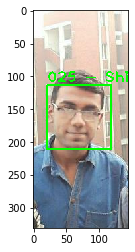

In [26]:
plt.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))
plt.show()